In [14]:
import numpy as np
import astropy.units as u

import jax.numpy as jnp
import jax

import scoobpsf
import scoobpsf.jax_dm as jdm
from scoobpsf.math_module import xp, _scipy, ensure_np_array
from scoobpsf.imshows import imshow1, imshow2, imshow3

from importlib import reload

scoobpsf.math_module.update_xp(jnp)

15.957446808510637


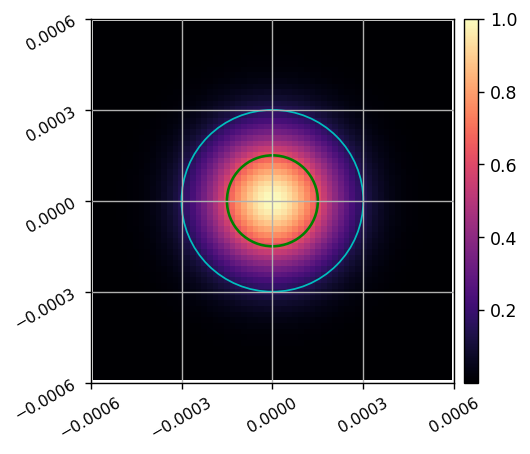

15.957446808510637 (63, 63)


In [20]:
# reload(scoobpsf.jax_dm)

dm_pupil_diam = 9.4*u.mm
npix = 500

reload(jdm)
act_spacing = 300e-6*u.m
pupil_pxscl = dm_pupil_diam.to_value(u.m)/npix
sampling = act_spacing.to_value(u.m)/pupil_pxscl
print(sampling)
inf_fun, inf_sampling, inf_pixelscale = jdm.make_gaussian_inf_fun(sampling=sampling, Nacts_per_inf=4, coupling=0.15, plot=True)
print(inf_sampling, inf_fun.shape)

2024-06-04 12:10:19.997613: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none
2024-06-04 12:10:22.451621: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none
2024-06-04 12:10:22.630982: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none
/home/kianmilani/miniconda3/envs/gpu311env/lib/python3.11/site-packages/jax/_src/ops/scatter.py:87: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=int64 to dtype=bool. In future JAX releases this will result in an error.
  warnings.warn("scatter inputs have incompatible types: cannot safely cast "
2024-06-04 12:10:23.357527: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none
2024-06-04 12:10:23.674821: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none


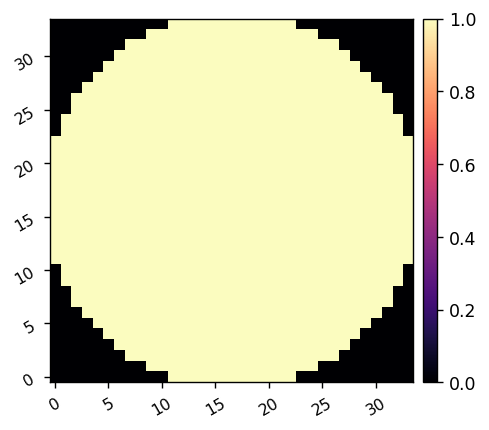

952


In [3]:
reload(jdm)
dm_mask = jdm.make_dm_mask(plot=True)
print(dm_mask.sum())

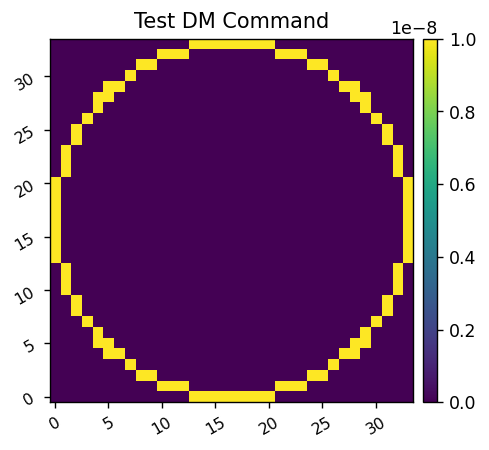

2024-06-04 12:13:58.006113: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none
2024-06-04 12:13:58.108983: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none
2024-06-04 12:13:58.202323: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none
2024-06-04 12:13:58.291610: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none


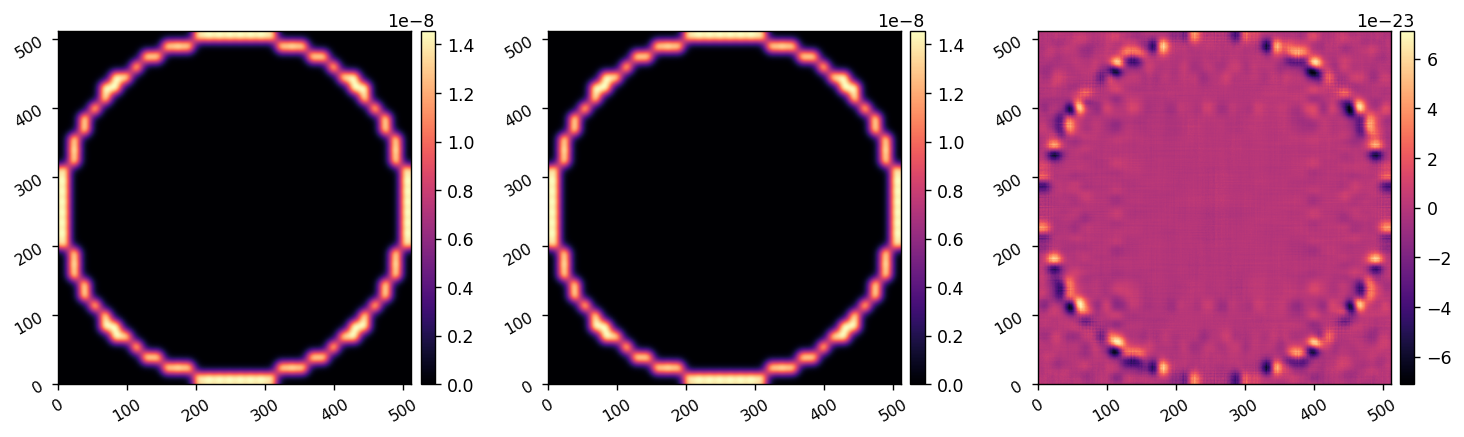

In [6]:
reload(jdm)
Nact = 34
xx = (np.linspace(0, Nact-1, Nact) - Nact/2 + 1/2)
x,y = np.meshgrid(xx,xx)
r = np.sqrt(x**2 + y**2)
ring_command = np.asarray((r<Nact//2)*(r>(Nact//2-1)), dtype=np.float64)
ring_command *= 1e-8
command = jnp.array(ring_command)
imshow1(ensure_np_array(command), 'Test DM Command', cmap='viridis')

test_surf = jdm.get_surf(command, inf_fun, inf_sampling)
imshow3(test_surf, jnp.rot90(jnp.rot90(test_surf)), test_surf-jnp.rot90(jnp.rot90(test_surf)) )



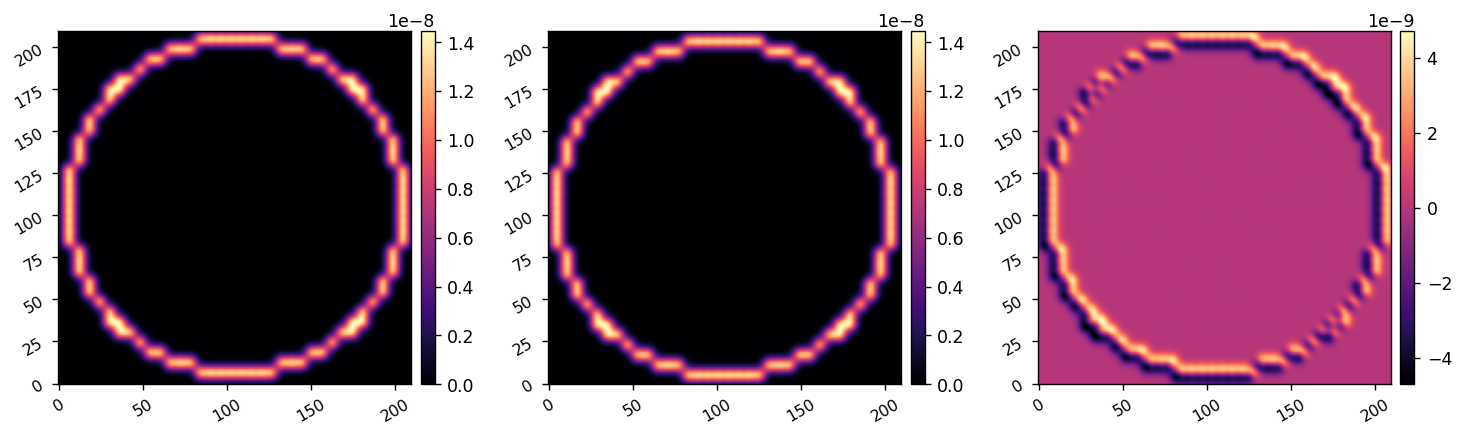

In [40]:
test_surf = jdm.get_surf(command, inf_fun, inf_sampling, inf_pixelscale=inf_pixelscale, pixelscale=50*u.um/u.pix,)
imshow3(test_surf, jnp.rot90(jnp.rot90(test_surf)), test_surf-jnp.rot90(jnp.rot90(test_surf)) )

2024-06-04 12:14:44.917595: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none
2024-06-04 12:14:45.121840: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none


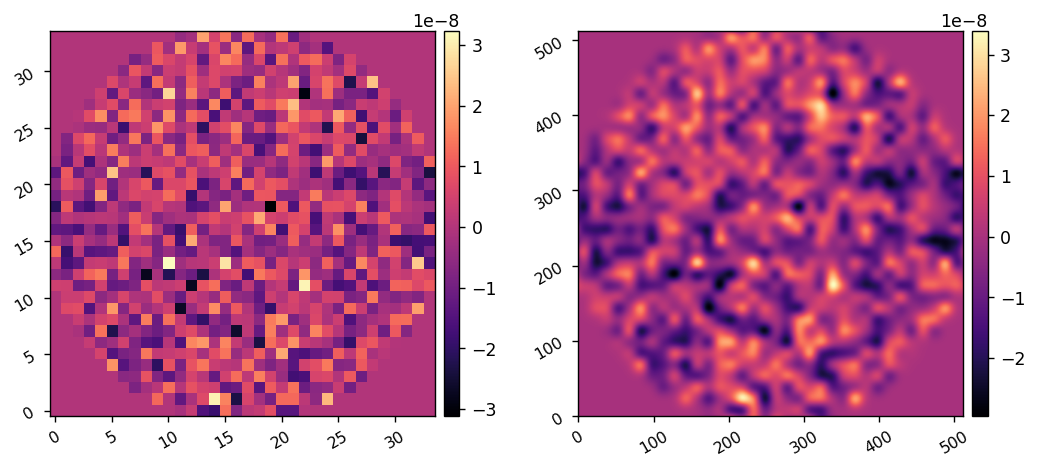

In [8]:
Nacts = 952
actuators = jnp.array(np.random.randn(Nacts)*1e-8)
command = jdm.map_actuators_to_command(actuators, dm_mask)
surf = jdm.get_surf(command, inf_fun, inf_sampling)
imshow2(command, surf)

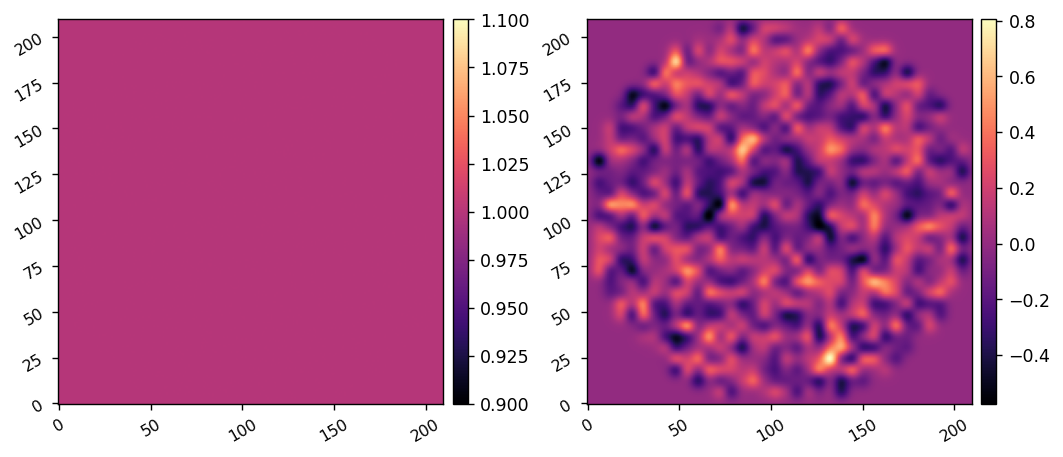

In [47]:
reload(jdm)
phasor = jdm.get_phasor(command, inf_fun, inf_sampling, inf_pixelscale=inf_pixelscale, pixelscale=50*u.um/u.pix)

imshow2(jnp.abs(phasor), jnp.angle(phasor))